# This project contains examples and explanations that cover most of the basic functionality of Open-CV.
### Author: Niv Rave
<a href="https://github.com/NivRave">My Github profile</a></br>
Contact via e-mail: nivikr@gmail.com
<a href="https://opencv.org/">Open-CV official website</a></br>
<a href="https://www.geeksforgeeks.org/set-opencv-anaconda-environment/">Geeks For Geeks - set Open-CV and anaconda</a></br>

## Imports

In [1]:
import cv2 as cv #Import open-cv
import numpy as np #Import numpy
import matplotlib.pyplot as plt #Import matplotlib

## Basic operations
### Import, read and display an image or video.

<h4>Image Basics</h4>
Read (import) and show an image.</br>
The used functions are cv.imread() for reading and importing and cv.imshow() for displaying the image in a new window.</br>
View the official documentation for more information:</br>
<a href="https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56">imread</a></br>
<a href="https://docs.opencv.org/3.4/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563">imshow</a></br>
cv.waitKey() is used to set the image show delay to 0.</br>
<a href="https://docs.opencv.org/3.4/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7">waitKey</a></br>



In [ ]:
img = cv.imread('Resources/Photos/Buddy01.jpeg')#Import an image and assign to a variable.
cv.imshow('Buddy', img)#Display the image in a new window. set 'Buddy' as the window title.
cv.waitKey(0)#Set delay to 0

<h4>Video Basics</h4>
Read (import) and play an existing video.</br>
The video is imported and saved in the 'cap' variable using cv.VideoCapture(). View
<a href="https://docs.opencv.org/3.4/d8/dfe/classcv_1_1VideoCapture.html">VideoCapture</a></br>
The play proccess is using an infinite 'while' loop, with the following flow:</br>
1. Frame read: Using the cv.VideoCapture().read() method, a frame is read and assigned to a 'frame' variableand a boolean value is returned to the ret_val variable. View <a href="https://docs.opencv.org/3.4/d8/dfe/classcv_1_1VideoCapture.html#a473055e77dd7faa4d26d686226b292c1">VideoCapture.read</a></br>
2. If the read() worked, display the frame in a new window using cv.imshow().
3. Check the loop's manual stop condition - if the 'q' key was pressed the loop will break and the play will stop.
4. If the read() returned False the loop will break.</br>
When the loop ends, we use VideoCapture().release() to release the video capture object and cv.destroyAllWindows()</br>
to close all open frames/windows.</br>
View:</br>
<a href="https://docs.opencv.org/3.4/d8/dfe/classcv_1_1VideoCapture.html#afb4ab689e553ba2c8f0fec41b9344ae6">VideoCapture.release</a></br>
<a href="https://docs.opencv.org/3.4/d7/dfc/group__highgui.html#ga6b7fc1c1a8960438156912027b38f481">destroyAllWindows</a></br>

In [ ]:
cap = cv.VideoCapture('Resources/Videos/Buddy01.mp4')#Import the video and assign to a variable.
while True:
    ret_val, frame = cap.read()#Captrure the next frame
    if ret_val == True:#If a frame exists
        cv.imshow('Buddy Video', frame)#Display the current frame
        if cv.waitKey(25) & 0xFF==ord('q'):#Press 'q' key to stop and exit
            break
    else:#No frame exists, break the loop
        break
        
cap.release()#Release the video capture object
cv.destroyAllWindows()#Close all the windows/frames

<h4>Rescale Basics</h4>
The below defined function resize_frame() takes a frame and scale (set to default = 75%) as arguments and</br>
returns a resized frame using the cv.resize() function.</br>
<b>The usage of cv.resize() will be further explored in the more advanced sections</b></br>
View <a href="https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d">resize</a></br>
The image height equals to the 'shape 0' value - number of rows and the width to 'shape 1' - number of columns.</br></br>

---
In the following cells we apply the function to the previous used image and video display algorithms to view the outcome.</br>

In [ ]:
def resize_frame(frame, scale=0.75):
    height = int(frame.shape[0]*scale)#Rescale new height
    width = int(frame.shape[1]*scale)#Rescale new width
    return cv.resize(frame, (width, height), interpolation=cv.INTER_AREA)#Resize and return the resized frame

In [ ]:
## Display the original and resized images
img = cv.imread('Resources/Photos/Buddy01.jpeg')#Import an image and assign to a variable
resized_img = resize_frame(img)#Resize the image using the above created function resize_frame()
resized_img2 = resize_frame(img, 0.5)#Resize the image to 50% using the above created function resize_frame()
cv.imshow('Buddy', img)#Display the original image in a new window
cv.imshow('Buddy Resized', resized_img)#Display the resized image in a new window
cv.imshow('Buddy Resized 2', resized_img2)#Display the resized image in a new window

cv.waitKey(0)#Set delay to 0

In [ ]:
## Display the original and resized video
cap = cv.VideoCapture('Resources/Videos/Buddy01.mp4')#Import the video and assign to a variable
while True:
    ret_val, frame = cap.read()#Captrure the next frame
    if ret_val == True:#If a frame exists
        frame_resized = resize_frame(frame)
        cv.imshow('Buddy Video', frame)#Display the original frame
        cv.imshow('Buddy Video Resized', frame_resized)#Display the resized frame
        if cv.waitKey(25) & 0xFF==ord('q'):#Press 'q' key to stop and exit
            break
    else:#No frame exists, break the loop
        break
        
cap.release()#Release the video capture object
cv.destroyAllWindows()#Close all the windows/frames

## Draw, paint and text basics

<h4>Canvas creation</h4>
The function create_canvas() implemented below creates and returns a new blac/white canvas to be assigned to a variable and used.</br>
If called as '= create_canvas()' the function will return a new 300X300 sized white canvas.</br>
The function accepts width and height parameters and any 3<sup>rd</sup> arguments will cause the returned canvas to be black.

In [ ]:
## Canvas creation function
def create_canvas(width=300, height=300, colour="white"):
    if colour == "white":
        return np.full((int(width),int(height),3),255, dtype = 'uint8')#Create a white canvas using a numpy array, sized 300X300.
    else:
        return np.zeros((int(width),int(height),3), dtype = 'uint8')#Create a black canvas using a numpy array, sized 300X300.

In [ ]:
## Basic image painting - canvas creation
black_canvas = create_canvas(250,250,"black")
cv.imshow('Black canvas', black_canvas)
white_canvas = create_canvas()
cv.imshow('White canvas', white_canvas)
cv.waitKey(0)

<h4>Single colour painting</h4>
The cell below demonstrates a single colour painting.</br>
By defining the entire canvas cell values to be any single color B/G/R value we can paint the entire canvas.</br>
Try different B,G,R combinations (0-255 each) to test different colours.</br>

In [ ]:
## Basic image painting - one color canvas painting
canvas = create_canvas()
canvas[:] = 0,0,255
cv.imshow('Red Canvas', canvas)
canvas[:] = 0,255,0
cv.imshow('Green Canvas', canvas)
canvas[:] = 255,0,0
cv.imshow('Blue Canvas', canvas)
cv.waitKey(0)

<h4>Horizontal/vertical painting</h4>
The cell below presents different horizontal/vertical black and white painting combinations.</br>
In those examples the canvas was divided as 50-50. Change the indexing to try different combinations.</br>
Change the assigned values (B,G,R) to check different colour combinations.</br>

In [ ]:
## Basic image painting - shape painting
# Horizontal
canvas = create_canvas()
canvas[150:] = 0,0,0#Set all rows > 150 to value 0,0,0 -> black colour
cv.imshow('White and black horizontal split', canvas)
canvas[0:150] = 0,0,0#Set all rows < 150 to value 0,0,0 -> black colour
canvas[150:] = 255,255,255#Set all rows > 150 to value 255,255,255 -> white colour
cv.imshow('Black and white horizontal split', canvas)
# Vertical
canvas = create_canvas()
canvas[:,150:] = 0,0,0#Set all columns > 150 to value 0,0,0 -> black colour
cv.imshow('White and black vertical split', canvas)
canvas[:,0:150] = 0,0,0#Set all rows < 150 to value 0,0,0 -> black colour
canvas[:,150:] = 255,255,255#Set all rows > 150 to value 255,255,255 -> white colour
cv.imshow('Black and white vertical split', canvas)
cv.waitKey(0)

<h4>Open CV shapes</h4>
This section contains different shapes painted using different open-cv functions.</br>
View <a href="https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2">line</a></br>
View <a href="https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9">rectangle</a></br>
View <a href="https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670">circle</a>


In [ ]:
#Line
canvas = create_canvas()
cv.line(canvas, (0,0), (canvas.shape[1]//2,canvas.shape[0]//2), (0,0,0), thickness=5)#Create a diagonal line, starting at (0,0), spreading to the center with thickness=5 px
cv.imshow('Diagonal line', canvas)
canvas = create_canvas()
cv.line(canvas, (canvas.shape[1]//2,0), (canvas.shape[1]//2,canvas.shape[0]), (0,0,0), thickness=5)#Create a diagonal line, starting at (0,0), spreading to the center with thickness=5 px
cv.imshow('Vertical center line', canvas)
canvas = create_canvas()
cv.line(canvas, (0,canvas.shape[0]//2), (canvas.shape[1],canvas.shape[0]//2), (0,0,0), thickness=5)#Create a diagonal line, starting at (0,0), spreading to the center with thickness=5 px
cv.imshow('Horizontal center line', canvas)
canvas = create_canvas()
cv.line(canvas, (canvas.shape[1]//2,0), (canvas.shape[1]//2,canvas.shape[0]), (0,0,0), thickness=5)#Create a diagonal line, starting at (0,0), spreading to the center with thickness=5 px
cv.line(canvas, (0,canvas.shape[0]//2), (canvas.shape[1],canvas.shape[0]//2), (0,0,0), thickness=5)#Create a diagonal line, starting at (0,0), spreading to the center with thickness=5 px
cv.imshow('Cross', canvas)
cv.waitKey(0)

In [ ]:
#Empty rectrangle
canvas = create_canvas()
cv.rectangle(canvas, (0,0), (canvas.shape[1]//2,canvas.shape[0]//2), (0,0,0), thickness=1)#Create a rectangle, starting at (0,0), spreading to (150,150) with a thickness of 1 px
cv.imshow('Basic black rectangle', canvas)
canvas = create_canvas()
cv.rectangle(canvas, (canvas.shape[1]//2,canvas.shape[0]//2), (canvas.shape[1],canvas.shape[0]), (0,0,0), thickness=1)#Create a rectangle, starting at (0,0), spreading to (150,150) with a thickness of 1 px
cv.imshow('Basic black rectangle 2', canvas)
canvas = create_canvas()
cv.rectangle(canvas, (100,100), (200,200), (0,0,0), thickness=2)#Create a rectangle around the center with a thickness of 2 px
cv.imshow('Centered black rectangle', canvas)
cv.waitKey(0)

In [ ]:
#Filled rectrangle
canvas = create_canvas()
cv.rectangle(canvas, (0,0), (canvas.shape[1]//2,canvas.shape[0]//2), (0,0,0), thickness=cv.FILLED)#Create a filled rectangle, starting at (0,0), spreading to (150,150)
cv.imshow('Basic black rectangle', canvas)
canvas = create_canvas()
cv.rectangle(canvas, (canvas.shape[1]//2,canvas.shape[0]//2), (canvas.shape[1],canvas.shape[0]), (0,0,0), thickness=cv.FILLED)#Create a filled rectangle, starting at (0,0), spreading to (150,150)
canvas = create_canvas()
cv.rectangle(canvas, (100,100), (200,200), (0,0,0), thickness=cv.FILLED)#Create a filled rectangle around the center
cv.imshow('Centered black rectangle', canvas)
cv.waitKey(0)

In [ ]:
#Empty circle
canvas = create_canvas()
cv.circle(canvas, (canvas.shape[1]//2,canvas.shape[0]//2), 10, (0,0,0), thickness=1)#Create a circle around the center, radius = 10, thickness of 1 px
cv.imshow('Circle 1', canvas)
canvas = create_canvas()
cv.circle(canvas, (canvas.shape[1]//2,canvas.shape[0]//2), 50, (0,0,0), thickness=2)#Create a circle around the center, radius = 50, thickness of 2 px
cv.imshow('Circle 2', canvas)
cv.waitKey(0)

In [ ]:
#Filled circle
canvas = create_canvas()
cv.circle(canvas, (canvas.shape[1]//2,canvas.shape[0]//2), 10, (0,0,0), thickness=cv.FILLED)#Create a filled circle around the center, radius = 10
cv.imshow('Circle 1', canvas)
canvas = create_canvas()
cv.circle(canvas, (canvas.shape[1]//2,canvas.shape[0]//2), 50, (0,0,0), thickness=cv.FILLED)#Create a filled circle around the center, radius = 50
cv.imshow('Circle 2', canvas)
cv.waitKey(0)

<h4>Circles pattern</h4>
In this cell we draw mutliple circles as a pattern.</br>
We use numpy.linspace() to create an array of integers to be used as radiuses.</br>
View <a href="https://numpy.org/doc/stable/reference/generated/numpy.linspace.html">numpy.linspace</a></br>
The array will contain integers between 10 to 100 with a jump of 10.</br>
To create the pattern we loop through the radiuses array and add a new circle with each radius to the canvas.</br>
Change the circles to any other shape (rectangle, etc.) by changing the cv.circle() function to another one of choise.

In [ ]:
canvas = create_canvas()
radiuses = np.linspace(10,100,10, dtype=int)#Create radius array, 10 points between 10 and 100
for radius in radiuses:
    cv.circle(canvas, (canvas.shape[1]//2,canvas.shape[0]//2), radius, (0,0,0), thickness=1)#Create a circle around the center, radius changes, thickness of 1 px
cv.imshow('Circles', canvas)
cv.waitKey(0)

<h4>Add text to image</h4>
The cells below show the basic method of writing text to an image with different examples.</br>
Adding the text using the cv.putText() function</br>
Change the content (string), Point (first tuple), font (cv.FONT_HERSHEY_*), colour (second tuple), scale (double) and thickness (integer) to modify the added text)</br>
View <a href="https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576">putText</a></br>

In [ ]:
canvas = create_canvas()
cv.putText(canvas, 'Hello World!', (50,50), cv.FONT_HERSHEY_SIMPLEX, 1.0, 2)#Add the text 'Hello World!' starting at (50,50) with a thickness of 2 px
cv.imshow('Hello World!', canvas)
canvas = create_canvas()
cv.putText(canvas, 'Hello World!', (50,200), cv.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,255), 2)#Add the text 'Hello World!' starting at (50,200) with a red colour thickness of 2 px
cv.imshow('Hello World! low red', canvas)
canvas = create_canvas()
cv.putText(canvas, 'Hello World!', (50,50), cv.FONT_HERSHEY_SIMPLEX, 0.5, 5)#Add the text 'Hello World!' starting at (50,50), scaled to 50% with a thickness of 5 px
cv.imshow('Hello World! small', canvas)
cv.waitKey(0)

## Basic Image Manipulation
The following section contain different basic image manipulation methods.</br>

<h4>Convert a coloured image to grayscale</h4>
The next cell imports an image and converts it to grayscale.</br>
There are many algorithms that require the usage of grayscale images as input, which makes this function very important to know.</br>
We use the cv.imread() function to import and the cv.cvtColor() with the 'cv.COLOR_BGR2GRAY' integer code to convert to grayscale.</br>
View <a href="https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab">cvtColor</a></br>


In [ ]:
img = cv.imread('Resources/Photos/Buddy02.jpeg')#Import an image and assign to a variable.
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)#Convert to grayscale
cv.imshow('Original Buddy', img)
cv.imshow('Gray Buddy', gray_image)
cv.waitKey(0)

<h4>Threshold image</h4>
Some algorithms require a binary representation of an image (complete black or white).</br>
For that, we convert a grayscale image to binary by a certain threhold using the cv.threshold() function.</br>
The function takes the image,  a threshold value, the max value to be used and a threshold type.</br>
The conversion happens by dividing the image to 0 and 1, black and white - according to the given threshold type.</br>
Different threshold values will affect the seperation/division.</br>
The first cell below contains examples of binary and inverted binary threshold types, each with 2 different threshold values.</br>
The second cell contains an example of an adaptive threshold, using cv.adaptiveThreshold(), which is a way of calculating the optimad threshold according to a chosen adaptive threshold type.</br>
The function cv.adaptiveThreshold() takes and adaptive threshold type, the kernel size and a constant to be removed from the mean.</br>
View <a href="https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57">threshold</a></br>
View <a href="https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576
">threshold types</a></br>
View <a href="https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3">adaptiveThreshold</a></br>
View <a href="https://docs.opencv.org/3.4/d7/d1b/group__imgproc__misc.html#gaa42a3e6ef26247da787bf34030ed772c
">adaptive threshold types</a></br>

In [3]:
img = cv.imread('Resources/Photos/Buddy01.jpeg', cv.IMREAD_GRAYSCALE)#Import an image, convert to grayscale and assigne to a variable
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2), interpolation = cv.INTER_AREA)
cv.imshow('Gray Buddy', img)
th1, threshold_binary = cv.threshold(img, 150, 255, cv.THRESH_BINARY)#Create a binary image with a threshold of 150 using THRESH_BINARY
cv.imshow('Threshold binary th=150', threshold_binary)
th1, threshold_binary = cv.threshold(img, 100, 255, cv.THRESH_BINARY)#Create a binary image with a threshold of 100 using THRESH_BINARY
cv.imshow('Threshold binary th=100', threshold_binary)
th2, threshold_binary_inverted = cv.threshold(img, 150, 255, cv.THRESH_BINARY_INV)#Create a binary image with a threshold of 150 using THRESH_BINARY_INV
cv.imshow('Threshold binary inverted th=150', threshold_binary_inverted)
th2, threshold_binary_inverted = cv.threshold(img, 100, 255, cv.THRESH_BINARY_INV)#Create a binary image with a threshold of 100 using THRESH_BINARY_INV
cv.imshow('Threshold binary inverted th=100', threshold_binary_inverted)
cv.waitKey(0)

-1

In [6]:
img = cv.imread('Resources/Photos/Buddy01.jpeg', cv.IMREAD_GRAYSCALE)#Import an image, convert to grayscale and assigne to a variable
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2), interpolation = cv.INTER_AREA)
cv.imshow('Gray Buddy', img)
adaptive_threshold_mean_7_0 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 7, 0)
adaptive_threshold_mean_11_0 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 0)
adaptive_threshold_mean_7_9 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 7, 9)
adaptive_threshold_mean_11_9 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 9)
cv.imshow('Adaptive threshold mean 7 0', adaptive_threshold_mean)
cv.imshow('Adaptive threshold mean 11 0', adaptive_threshold_mean_11)
cv.imshow('Adaptive threshold mean 7 9', adaptive_threshold_mean)
cv.imshow('Adaptive threshold mean 11 9', adaptive_threshold_mean_11)
cv.waitKey(0)

-1

<h4>Blur image</h4>
Blur an image using cv.GaussianBlur().</br>
The bigger (positive, odd) Size (first tuple) passed as an argument - the more blurry the image will be.</br>
View <a href="https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1">GaussianBlur</a></br>



In [ ]:
img = cv.imread('Resources/Photos/Buddy02.jpeg')#Import an image and assign to a variable.
blur_image = cv.GaussianBlur(img, (3,3), cv.BORDER_DEFAULT)#Blur with a kernel size of (3,3)
blurrer_image = cv.GaussianBlur(img, (9,9), cv.BORDER_DEFAULT)#Blur with a kernel size of (9,9)
cv.imshow('Original Buddy', img)
cv.imshow('Blur Buddy', blur_image)
cv.imshow('Blurrer Buddy', blurrer_image)
cv.waitKey(0)

<h4>Edge detection</h4>
Edge detection in an image can be very helpful.</br>
In this example I used the cv.Canny() function that uses the Canny edge detector algorithm to detecte the edges.</br>
View <a href="https://en.wikipedia.org/wiki/Canny_edge_detector">Canny edge detection algorithm (Wikipedia)</a></br>
View <a href="https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de">Canny</a></br>
cv.Canny() takes 3 arguments. The first one is the image and the other two are 2 thresholds used for a step from the Canny</br>
algorithm. Changing the threshold will affect the sensitivity of the edge detection algorithm.</br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy02.jpeg')#Import an image and assign to a variable.
canny_100 = cv.Canny(img, 100, 200)#Find the edges using 100 as a threshold
canny_200 = cv.Canny(img, 200, 300)#Find the edges using 200 as a threshold
cv.imshow('Original Buddy', img)
cv.imshow('Canny edges (100, 200)', canny_100)
cv.imshow('Canny edges (200, 300)', canny_200)
cv.waitKey(0)

##  Morphological Transformations
<h3>Below are implementaions and examples of dilation and erosion, two of operations of binary morphology</h3>
View <a href="https://en.wikipedia.org/wiki/Mathematical_morphology">Mathematical morphology (Wikipedia)</a></br>
View <a href="https://en.wikipedia.org/wiki/Dilation_(morphology)">Dilation (Wikipedia)</a></br>
View <a href="https://en.wikipedia.org/wiki/Erosion_(morphology)">Erosion (Wikipedia)</a></br>


<h4>Dilation</h4>
To apply dilation on binary images we use the cv.dilate() function.</br>
The function takes the image, a structuring image (kernel) and the number of iterations to repeat as arguments.</br>
View <a href="https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c">dilate</a></br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy03.jpeg', cv.IMREAD_GRAYSCALE)#Import an image, convert to grayscale and assigne to a variable
th1, threshold_binary_image = cv.threshold(img, 125, 255, cv.THRESH_BINARY)
cv.imshow('Binary Buddy', threshold_binary_image)
dilated_33_1 = cv.dilate(threshold_binary_image, (3,3), iterations=1)
cv.imshow('Dilated kernel 3x3, 1 iteration Buddy', dilated_33_1)
dilated_33_3 = cv.dilate(threshold_binary_image, (3,3), iterations=3)
cv.imshow('Dilated kernel 3x3, 3 iterations Buddy', dilated_33_3)
dilated_55_1 = cv.dilate(threshold_binary_image, (5,5), iterations=1)
cv.imshow('Dilated kernel 5x5, 1 iteration Buddy', dilated_55_1)
dilated_55_4 = cv.dilate(threshold_binary_image, (5,5), iterations=4)
cv.imshow('Dilated kernel 5x5, 4 iterations Buddy', dilated_55_4)
cv.waitKey(0)

<h4>Erosion</h4>
To apply erosion on binary images we use the cv.erode() function.</br>
The function takes the image, a structuring image (kernel) and the number of iterations to repeat as arguments.</br>
View <a href="https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb">erode</a></br>
Below there are several images shown:</br>
1. A canny image of Buddy</br>
2. A dilated image of Buddy</br>
3. Two Eroded images of the dilated image of Buddy</br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy03.jpeg', cv.IMREAD_GRAYSCALE)#Import an image, convert to grayscale and assign to a variable
canny_100 = cv.Canny(img, 100, 200)#Find the edges using 100 as a threshold
cv.imshow('Canny Buddy', canny_100)
dilated_33_3 = cv.dilate(canny_100, (3,3), iterations=3)
cv.imshow('Dilated kernel 3x3, 3 iterations Buddy', dilated_33_3)
eroded_33_1 = cv.erode(dilated_33_3, (3,3), iterations=1)
cv.imshow('Eroded kernel 3x3, 1 iteration Buddy', eroded_33_1)
eroded_33_3 = cv.erode(dilated_33_3, (3,3), iterations=3)
cv.imshow('Eroded kernel 3x3, 3 iterations Buddy', eroded_33_3)
cv.waitKey(0)

## Basic image transformations

<h4>Resize</h4>
Below are some advanced usages of cv.resize().</br>
The interpolation is changed on different scenarios, we mostly use cv.INTER_AREA when reducing the size and INTER_LINEAR when increasing to improve quality.</br>
View <a href="https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gga5bb5a1fea74ea38e1a5445ca803ff121acf959dca2480cc694ca016b81b442ceb">interpolaion</a></br>


In [ ]:
img = cv.imread('Resources/Photos/Buddy03.jpeg')#Import an image and assigne to a variable
resized_200_200_image = cv.resize(img, (200,200), interpolation = cv.INTER_AREA)#Reduce the image size to 200x200
cv.imshow('200x200 resized Buddy', resized_200_200_image)
resized_800_800_image_area = cv.resize(resized_200_200_image, (800,800), interpolation = cv.INTER_AREA)#Increase size to 800x800 using cv.INTER_AREA for interpolation
cv.imshow('800x800 resized bigger Buddy INTER_AREA', resized_800_800_image_area)
resized_800_800_image_linear = cv.resize(resized_200_200_image, (800,800), interpolation = cv.INTER_LINEAR )#Increase size to 800x800 using cv.INTER_LINEAR for interpolation
cv.imshow('800x800 resized bigger Buddy INTER_LINEAR', resized_800_800_image_linear)
cv.waitKey(0)

<h4>Crop</h4>
Each imported image is saved as an integer array.</br>
To crop the image/array we can use regular 2-D matrix manipulation techniques.</br>
Pay attention that an image is stored differently in python than in mathematics:</br>
-The 'X' axe is positive from left to right.</br>
-The 'Y' axe is positive downwards (opposed to familiared mathematics and geometry).</br>
View <a href="https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56">imread</a></br>


In [ ]:
img = cv.imread('Resources/Photos/Buddy02.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
cv.imshow('Resized Buddy', img)
left_half_cropped = img[:,0:img.shape[1]//2]
cv.imshow('Left cropped Buddy', left_half_cropped)
right_half_cropped = img[:,img.shape[1]//2:]
cv.imshow('Right cropped Buddy', right_half_cropped)
random_crop = img[150:450,110:450]
cv.imshow('Random cropped Buddy', random_crop)
cv.waitKey(0)

<h4>Shifting/translation</h4>
As mentioned before, the axes in python behave different than in mathematics.</br>
To shift an image we must follow these rules:</br>
1. Shift right => x++</br>
2. Shift left => x--</br>
3. Shift down => y++</br>
4. Shift up => y--<br>
The shift is made using cv.warpAffine() function.</br>
The function takes the image, a transformation matrix sized 2x3. Changing the values in the transform matrix will cause different shifting/transformations, and the image dimensions as arguments.</br>
Below we shift linearly - right, left, up, down, so that the 3<sup>rd</sup> value in each list is the amount of shift.</br>
View <a href="https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983">warpAffine</a></br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy03.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
cv.imshow('Original Buddy', img)
translation_matrix = np.float32([[1,0,100],[0,1,100]])
shifted_p100_p100 = cv.warpAffine(img, translation_matrix, (img.shape[1],img.shape[0]))
cv.imshow('Shifted Buddy +100, +100', shifted_p100_p100)
translation_matrix = np.float32([[1,0,-50],[0,1,75]])
shifted_m150_p75 = cv.warpAffine(img, translation_matrix, (img.shape[1],img.shape[0]))
cv.imshow('Shifted Buddy -50, +75', shifted_m150_p75)
cv.waitKey(0)

<h4>Rotation</h4>
Rotating an image can be very important to various purposes, including ML/AI.</br>
The image rotation below is made using the cv.getRotationMatrix2D() function to create the new rotation matrix.</br>
The function gets the rotation point (first tuple, in this case the center), the rotation angle (integer) and the scale (floating point, here set to 1.0 for no image scaling).</br>
Change each value to view the outcome.</br>
The transformation is made using the previously used cv.warpAffine() function with the new rotation matrix as the transformation matrix.</br>
View <a href="https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326">getRotationMatrix2D</a></br>
View <a href="https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983">warpAffine</a></br>


In [ ]:
img = cv.imread('Resources/Photos/Buddy04.jpeg')
img = cv.resize(img, (img.shape[1]//3,img.shape[0]//3))
angles = [45,90,135,180]
for angle in angles:
    rotation_matrix = cv.getRotationMatrix2D((img.shape[1]//2,img.shape[0]//2), angle, 1.0)
    rotated_image = cv.warpAffine(img, rotation_matrix, (img.shape[1], img.shape[0]))
    cv.imshow(f'Rotated Buddy by {angle}', rotated_image)
cv.waitKey(0)

<h4>Flipping</h4>
Some algorithms require mirrored image to process, for chaining and for other reasons.</br>
We use the cv.flip() function to flip an image.</br>
The cv.flip() takes the image to be flipped and a flipCode (-1 = flip vertical and horizontal, 0 = flip vertical, 1 = flip horizontal).</br>
View <a href="https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441">flip</a></br>


In [ ]:
img = cv.imread('Resources/Photos/Buddy04.jpeg')
img = cv.resize(img, (img.shape[1]//3,img.shape[0]//3))
cv.imshow('Original Buddy', img)
flips = [-1, 0, 1]
titles = ['Horizontal & Vertical', 'Vertical', 'Horizontal']
for i in range(3):
    flip = cv.flip(img, flips[i])
    cv.imshow(f'{titles[i]} flip using flipCode = {flips[i]}', flip)

cv.waitKey(0)

<h4>Basic contour detection</h4>
Contours are a continous curve along the boundary of an object that have the same colour or intensity.</br>
Contours are often used in object detection and recognition by applying different masking functions to isolate different parts of an image.</br>
To improve accuracy we use binary images. In the example below I have applied cv.canny() on the image but any other method can be used (such as cv.threshold() displayed above).</br>
The function used to find the contours is cv.findContours() that takes the image, the contour retrieval mode and the contour approximation method and outputs the modified image, the contours (a 2d numpy array of the (x,y) of each contour) and the hierarchy (more advanced, will be treated later).</br>
In the first cell below there are 2 examples that can show the difference of detecting contours betweep a sharp and blurry image. See the change in the print output.</br>
The second cell shows a way of drawing/visualizing the contours in an image using the cv.drawContours() function that takes the contours list, colour and thickness and draws the edges found on a new canvas.</br>
View <a href="https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a">findContours</a></br>
View <a href="https://docs.opencv.org/3.4/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc">drawContours</a></br>



In [ ]:
img = cv.imread('Resources/Photos/Buddy03.jpeg')
img = cv.resize(img, (img.shape[1]//3,img.shape[0]//3))
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur_gray_image = cv.GaussianBlur(gray_image, (5,5), cv.BORDER_DEFAULT)
cv.imshow('Original Buddy', gray_image)
cv.imshow('Blur Buddy', blur_gray_image)
#
canny_100 = cv.Canny(gray_image, 100, 200)#Find the edges using 100 as a threshold
cv.imshow('Canny Buddy', canny_100)
contours, hierarchy = cv.findContours(canny_100, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
print(f'{len(contours)} cotnours found for the original grayscale image')
#
canny_100 = cv.Canny(blur_gray_image, 100, 200)#Find the edges using 100 as a threshold
cv.imshow('Canny blurred Buddy', canny_100)
contours, hierarchy = cv.findContours(canny_100, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
print(f'{len(contours)} cotnours found for the original grayscale image')
cv.waitKey(0)

In [ ]:
img = cv.imread('Resources/Photos/Buddy03.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Original Buddy', gray_image)
#
canny_100 = cv.Canny(gray_image, 100, 200)#Find the edges using 100 as a threshold
cv.imshow('Canny Buddy', canny_100)
contours, hierarchy = cv.findContours(canny_100, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
#
canvas = create_canvas(canny_100.shape[0], canny_100.shape[1], "black")
cv.drawContours(canvas, contours, -1, (255,0,0),1)
cv.imshow('Canvas', canvas)
cv.waitKey(0)

<h2>Color spaces</h2>
Much can be explained about color spaces in Open-CV.</br>
The default color space used in OpenCV is a formatted RGB - BGR (blue, green, red).</br>
Below are some examples containing conversions and usages of different color spaces.

---
Below are some links to improve the understanding in that topic.</br>
View <a href="https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html">opencv.org</a></br>
View <a href="https://learnopencv.com/color-spaces-in-opencv-cpp-python/">LearnOpenCV.com</a></br>
View <a href="https://www.geeksforgeeks.org/color-spaces-in-opencv-python/">GeeksForGeeks.org</a></br>

<h4>BGR vs RGB</h4>
Open-CV uses BGR format while most other use RGB.</br>
Below desplayed the differences between RGB and BGR formatted images, displayed with Open-CV and Matplotlib.</br>
View <a href="https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.subplots.html">Matplotlib subplots</a></br>


In [ ]:
img = cv.imread('Resources/Photos/Buddy07.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#
cv.imshow('BGR Buddy', img)
cv.imshow('RGB Buddy', rgb)
#
fig, axs = plt.subplots(1,2)
axs[0].imshow(img)
axs[1].imshow(rgb)
axs[0].title.set_text('BGR')
axs[1].title.set_text('RGB')
plt.show()
cv.waitKey(0)

<h4>BGR to ___ conversions</h4>
Below are some different conversions using the cv.cvtColor() function used with different conversion codes to get different outputs.</br>
View <a href="https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab">cvtColor</a></br>
View <a href="https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0">ColorConversionCodes</a></br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy07.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
cv.imshow('BGR Buddy', img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray Buddy', gray)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow('HSV Buddy', hsv)
luv = cv.cvtColor(img, cv.COLOR_BGR2Luv)
cv.imshow('luv Buddy', luv)
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow('lab Buddy', lab)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow('RGB Buddy', rgb)
cv.waitKey(0)

<h4>___ to BGR conversions</h4>
Conversion from/to BGR is simple and straight-forward using the cv.cvtColor() function.</br>
Conversion between different color spaces is more complicated and require using BGR as a link. For example:</br>
To convert grayscale to hsv we need to convert the grayscale to BGR and the BGR to hsv.</br>
Below are some examples of reverse conversions - converting <b>to BGR</b>.</br>
View <a href="https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab">cvtColor</a></br>
View <a href="https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0">ColorConversionCodes</a></br>

In [ ]:
#Create the different color space images to convert from
img = cv.imread('Resources/Photos/Buddy08.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
luv = cv.cvtColor(img, cv.COLOR_BGR2Luv)
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#Conversion of each to BGR
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
hsv_bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
luv_bgr = cv.cvtColor(luv, cv.COLOR_Luv2BGR)
lab_bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
rgb_bgr = cv.cvtColor(rgb, cv.COLOR_RGB2BGR)
cv.imshow('Grayscale to bgr', gray_bgr)
cv.imshow('HSV to bgr', hsv_bgr)
cv.imshow('Luv to bgr', luv_bgr)
cv.imshow('LAB to bgr', lab_bgr)
cv.imshow('RGB to bgr', rgb_bgr)
cv.waitKey(0)

<h4>Channel split</h4>
Splitting to different RGB/BGR channels can help in alazyzing specific areas/sections/colors of the image and in different conversions (if needed to use RGB instead of BGR for example).</br>
Below I used the cv.split() function to split the image in to 3 different channels - b, g, r for blue, green, red.</br>
You can see the difference of the intensity in different areas where the original image had stronger and more obselete values for red/green/blue.</br>
The function cv.merge() is used to merge the seperate channels into one by an order (b,g,r for BGR and r,g,b for RGB).</br>
View <a href="https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga8027f9deee1e42716be8039e5863fbd9">split</a></br>
View <a href="https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d">merge</a></br>


In [ ]:
img = cv.imread('Resources/Photos/Buddy07.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
#Split channels to b=blue, g=green, r=red
b, g, r = cv.split(img)
cv.imshow("Original", img)
cv.imshow("Blue intensity", b)
cv.imshow("Green intensity", g)
cv.imshow("Red intensity", r)
#Merge channels to BGR/RGB
merged_bgr = cv.merge([b,g,r])
merged_rgb = cv.merge([r,g,b])
cv.imshow("Merged BGR", merged_bgr)
cv.imshow("Merged RGB", merged_rgb)
#Display one channel only
canvas = np.zeros(img.shape[:2], dtype = 'uint8')
blue_image = cv.merge([b,canvas,canvas])
green_image = cv.merge([canvas,g,canvas])
red_image = cv.merge([canvas,canvas,r])
cv.imshow("Merged blue", blue_image)
cv.imshow("Merged green", green_image)
cv.imshow("Merged red", red_image)
cv.waitKey(0)

<h2>Advanced bluring/smoothing</h2>
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise.</br>
Different blur algorithms provide different results, some are sharper, some enhance object seperation and edges and each has its own usage.</br>
The cells below demonstrate the use of different blur algorithms/functions and the last cell contains a comparison of different blur applied on the same image.</br>

---
View <a href="https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html">Open-CV Smoothing Images</a></br>
View <a href="https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37">blur</a></br>
View <a href="https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1">GaussianBlur</a></br>
View <a href="https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9">medianBlur</a></br>
View <a href="https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed">bilateralFilter</a></br>


<h4>Average blur</h4>
Averaging is done by convulving an image with a normalized box filter (kernel).</br>
That method takes the average around the central element in a kernel area and replace the center with the average.</br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy09.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
average_blur_3_3 = cv.blur(img, (3,3))
average_blur_5_5 = cv.blur(img, (5,5))
cv.imshow("Original Buddy", img)
cv.imshow("Average blur 3x3 Buddy", average_blur_3_3)
cv.imshow("Average blur 5x5 Buddy", average_blur_5_5)
cv.waitKey(0)

<h4>Gaussian blur</h4>
Gaussian blur uses a Gaussian kernel instead of the box filter, the standard deviation in the x and y directions and is highly effective in removing Gaussian noise from an image.</br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy09.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
gaussian_blur_3_3 = cv.GaussianBlur(img, (3,3), 0, 0)
gaussian_blur_5_5 = cv.GaussianBlur(img, (5,5), 0, 0)
cv.imshow("Original Buddy", img)
cv.imshow("Gaussian blur 3x3 Buddy", gaussian_blur_3_3)
cv.imshow("Gaussian blur 5x5 Buddy", gaussian_blur_5_5)
cv.waitKey(0)

<h4>Median blur</h4>
The Median blur takes the median of the pixels under the kernel area instead of the average and replaces the center with that value.</br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy09.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
median_blur_3_3 = cv.medianBlur(img, 3)
median_blur_5_5 = cv.medianBlur(img, 5)
cv.imshow("Original Buddy", img)
cv.imshow("Median blur 3x3 Buddy", median_blur_3_3)
cv.imshow("Median blur 5x5 Buddy", median_blur_5_5)
cv.waitKey(0)

<h4>Bilateral blur</h4>
The Bilateral blur method is hight effective in keeping the edges sharp and the outcome looks very similar to the original image with a more smooth, paint-like background.</br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy09.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
bilateral_blur_3 = cv.bilateralFilter(img, 3, 35, 25)
bilateral_blur_10 = cv.bilateralFilter(img, 10, 35, 25)
cv.imshow("Original Buddy", img)
cv.imshow("Bilateral blur 3 Buddy", bilateral_blur_3)
cv.imshow("Bilateral blur 10 Buddy", bilateral_blur_10)
cv.waitKey(0)

<h4>Different blur comparison</h4>

In [ ]:
img = cv.imread('Resources/Photos/Buddy08.jpeg')
img = cv.resize(img, (img.shape[1]//2,img.shape[0]//2))
#Average blur
average_blur_7_7 = cv.blur(img, (7,7))
#Gaussian blur
gaussian_blur_7_7 = cv.GaussianBlur(img, (7,7), 0, 0)
#Median blur
median_blur_7_7 = cv.medianBlur(img, 7)
#Bilateral blur
bilateral_blur_10 = cv.bilateralFilter(img, 10, 35, 25)
#Image show
cv.imshow("Original Buddy", img)
cv.imshow("Average blur 7x7 Buddy", average_blur_7_7)
cv.imshow("Gaussian blur 7x7 Buddy", gaussian_blur_7_7)
cv.imshow("Median blur 7x7 Buddy", median_blur_7_7)
cv.imshow("Bilateral blur 10 Buddy", bilateral_blur_10)
cv.waitKey(0)

<h2>Bitwise operations and operators</h2>
Open-CV allows the usage of bitwise operations and operators to manipulate images.</br>
We will be using shapes (rectangle, circle) created using the different Open-CV functions to demonstrate the outcome.</br>
View <a href="https://www.geeksforgeeks.org/arithmetic-operations-on-images-using-opencv-set-2-bitwise-operations-on-binary-images/">Geeks For Geeks Bitwise Operations on Binary Images</a></br>


<h4>Bitwise AND</h4>
Bitwise AND takes only the common/shared regions of several images.</br>
View <a href="https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14">bitwise_and</a></br>


In [ ]:
canvas = create_canvas(500,500, "blacl")
#Filled rectrangle
rectangle = cv.rectangle(canvas.copy(), (75,75), (425,425), (255,255,255), thickness=cv.FILLED)#Create a filled rectangle, starting at (0,0), spreading to (150,150)
cv.imshow('Rectangle', rectangle)
#Filled circle
circle = cv.circle(canvas.copy(), (canvas.shape[1]//2,canvas.shape[0]//2), 200, (255,255,255), thickness=cv.FILLED)#Create a filled circle around the center, radius = 10
cv.imshow('Circle', circle)
rectrangle_and_circle = cv.bitwise_and(rectangle, circle)
cv.imshow('Rectangle AND Circle', rectrangle_and_circle)
cv.waitKey(0)

<h4>Bitwise OR</h4>
Bitwise OR combines several images.</br>
View <a href="https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gab85523db362a4e26ff0c703793a719b4">bitwise_or</a></br>

In [ ]:
canvas = create_canvas(500,500, "black")
#Filled rectrangle
rectangle = cv.rectangle(canvas.copy(), (75,75), (425,425), (255,255,255), thickness=cv.FILLED)#Create a filled rectangle, starting at (0,0), spreading to (150,150)
cv.imshow('Rectangle', rectangle)
#Filled circle
circle = cv.circle(canvas.copy(), (canvas.shape[1]//2,canvas.shape[0]//2), 200, (255,255,255), thickness=cv.FILLED)#Create a filled circle around the center, radius = 10
cv.imshow('Circle', circle)
rectrangle_or_circle = cv.bitwise_or(rectangle, circle)
cv.imshow('Rectangle OR Circle', rectrangle_or_circle)
cv.waitKey(0)

<h4>Bitwise XOR</h4>
Bitwise XOR takes only the non-common/non-shared regions in several images.</br>
View <a href="https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga84b2d8188ce506593dcc3f8cd00e8e2c">bitwise_xor</a></br>

In [ ]:
canvas = create_canvas(500,500, "black")
#Filled rectrangle
rectangle = cv.rectangle(canvas.copy(), (75,75), (425,425), (255,255,255), thickness=cv.FILLED)#Create a filled rectangle, starting at (0,0), spreading to (150,150)
cv.imshow('Rectangle', rectangle)
#Filled circle
circle = cv.circle(canvas.copy(), (canvas.shape[1]//2,canvas.shape[0]//2), 200, (255,255,255), thickness=cv.FILLED)#Create a filled circle around the center, radius = 10
rectrangle_xor_circle = cv.bitwise_xor(rectangle, circle)
cv.imshow('Circle', circle)
cv.imshow('Rectangle OR Circle', rectrangle_xor_circle)
cv.waitKey(0)

<h4>Bitwise NOT</h4>
Bitwise NOT inverts binary colours.</br>
View <a href="https://docs.opencv.org/4.x/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f">bitwise_not</a></br>

In [ ]:
canvas = create_canvas(500,500, "black")
#Filled circle
circle = cv.circle(canvas.copy(), (canvas.shape[1]//2,canvas.shape[0]//2), 200, (255,255,255), thickness=cv.FILLED)#Create a filled circle around the center, radius = 10
#Reverse the circle using bitwise_not
circle_not = cv.bitwise_not(circle)
cv.imshow('Circle', circle)
cv.imshow('Circle NOT', circle_not)
cv.waitKey(0)

<h2>Masking</h2>
Masking uses bitwise operators to mask (extract) a certain area from an image.</br>
You can think of masking as placing an image as a mask ontop of another image and only keeping the masked area.</br>
We perform the masking using the cv.bitwise_and() function.</br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy06.jpeg')
img = cv.resize(img, (img.shape[1]//3,img.shape[0]//3))
#Create a mask image
canvas = create_canvas(img.shape[0],img.shape[1], "black")
mask = cv.circle(canvas,(canvas.shape[1]//2,canvas.shape[0]//2), 200, (255,255,255), thickness=cv.FILLED)
#Apply the mask using bitwise_and
masked_image = cv.bitwise_and(img,mask)
#Show the images
cv.imshow("Original Buddy", img)
cv.imshow("Mask", mask)
cv.imshow("Masked Buddy", masked_image)
cv.waitKey(0)

<h2>Histograms</h2>
A Histogram is a graph containing information about the intensity distribution of an image.</br>
Using a Histogram we can get learn about the contrast, brightness and intensity distribution of an image, both of a grayscale or a color image.</br>
A Histogram uses 'BINS' to represent the batch size. In the examples below, we use 256 BINS - 1 for each pixel but we can use different values for that argument to concentrate pixel intensities together to get different output.</br>
To get the Histogram using Open-CV we use the cv.calcHist() function with 5 arguments, listed below in order:</br>
1. The desired image or images as a list (even for one image).</br>
2. The channels, for a grayscale image we provide '0' as the number of channels and for color we can provide '0', '1', '2' for blue, green and red channels respectivly.</br>
3. A mask - you can choose between masking an image (3<sup>rd</sup> cell below) to get the output for an isolated area or passing 'NONE' to not use any mask.</br>
4. The BIN count, as explained above (I used 256 for clearer explanation) - will be 2<sup>n</sup></br>
5. The range - pixel range, will normally be 0, 256.</br>
View <a href="https://docs.opencv.org/3.4/d1/db7/tutorial_py_histogram_begins.html">Open-CV Histogram</a></br>
View <a href="https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d">calcHist</a></br>

<h4>Grayscale Histogram</h4>
Below are 3 examples of the Histogram of an image.</br>
The first one is an image converted to grayscale, therefor containing a range of values.</br>
The second one is the Histogram of an image that was converted to binary using cv.threshold().</br>
Notice that this Histogram contains only 2 intensities - around the '0' and '255', matching the binary representation.</br>
The third one uses a mask (same masked used in the above example at the 'Masking' section).</br>

In [ ]:
img = cv.imread('Resources/Photos/Buddy06.jpeg')
img = cv.resize(img, (img.shape[1]//3,img.shape[0]//3))
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#Calculate the histogram
gray_histogram = cv.calcHist([gray_image],[0], None, [256], [0,256])
#Show the image
cv.imshow("Gray Buddy", gray_image)
#Plot the histogram
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.plot(gray_histogram)
plt.show()
cv.waitKey(0)

In [ ]:
img = cv.imread('Resources/Photos/Buddy06.jpeg')
img = cv.resize(img, (img.shape[1]//3,img.shape[0]//3))
th1, threshold_binary = cv.threshold(img, 150, 255, cv.THRESH_BINARY)#Create a binary image with a threshold of 150 using THRESH_BINARY
#Calculate the histogram
gray_histogram = cv.calcHist([threshold_binary],[0], None, [256], [0,256])
#Show the image
cv.imshow("Binary Buddy", threshold_binary)
#Plot the histogram
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.plot(gray_histogram)
plt.show()
cv.waitKey(0)

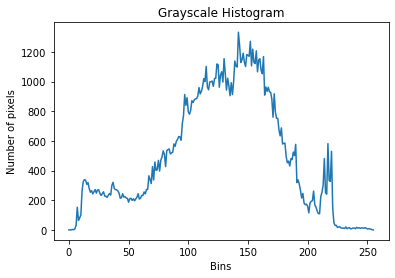

-1

In [40]:
img = cv.imread('Resources/Photos/Buddy06.jpeg')
img = cv.resize(img, (img.shape[1]//3,img.shape[0]//3))
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#Create a mask image
canvas = np.zeros(gray_image.shape[:2], dtype = 'uint8')
mask = cv.circle(canvas,(canvas.shape[1]//2,canvas.shape[0]//2), 200, (255,255,255), thickness=cv.FILLED)
masked_image = cv.bitwise_and(gray_image, gray_image, mask=mask)
#Calculate the histogram
gray_histogram = cv.calcHist([gray_image],[0], masked_image, [256], [0,256])
#Show the image
cv.imshow("Masked Buddy", masked_image)
#Plot the histogram
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.plot(gray_histogram)
plt.show()
cv.waitKey(0)

<h4>Color Histogram</h4>
Below are two examples of the Histogram plot and calculation of a colored image.</br>
The first one is the regular image and the second one is masked.</br>

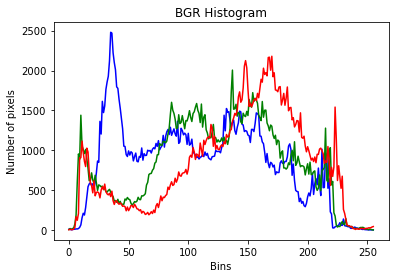

-1

In [43]:
img = cv.imread('Resources/Photos/Buddy06.jpeg')
img = cv.resize(img, (img.shape[1]//3,img.shape[0]//3))
#Calculate the histogram for each channel
blue_histogram = cv.calcHist([img], [0], None, [256], [0,256])
green_histogram = cv.calcHist([img], [1], None, [256], [0,256])
red_histogram = cv.calcHist([img], [2], None, [256], [0,256])
#Show the image
cv.imshow("Original Buddy", img)
#Plot the histogram
plt.figure()
plt.title('BGR Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.plot(blue_histogram, color='b')
plt.plot(green_histogram, color='g')
plt.plot(red_histogram, color='r')
plt.show()
cv.waitKey(0)

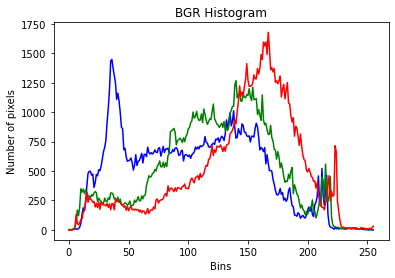

-1

In [50]:
img = cv.imread('Resources/Photos/Buddy06.jpeg')
img = cv.resize(img, (img.shape[1]//3,img.shape[0]//3))
canvas = np.zeros(gray_image.shape[:2], dtype = 'uint8')
mask = cv.circle(canvas,(canvas.shape[1]//2,canvas.shape[0]//2), 200, (255,255,255), thickness=cv.FILLED)
masked_image = cv.bitwise_and(img, img, mask=mask)
#Calculate the histogram for each channel
blue_histogram = cv.calcHist([img], [0], mask, [256], [0,256])
green_histogram = cv.calcHist([img], [1], mask, [256], [0,256])
red_histogram = cv.calcHist([img], [2], mask, [256], [0,256])
#Show the image
cv.imshow("Masked Buddy", masked_image)
#Plot the histogram
plt.figure()
plt.title('BGR Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.plot(blue_histogram, color='b')
plt.plot(green_histogram, color='g')
plt.plot(red_histogram, color='r')
plt.show()
cv.waitKey(0)
